In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
datos = pd.read_csv('diabetes.csv')
display(datos.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
X = datos.drop('Glucose', axis=1).values  
y = datos['Glucose'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [40]:
class DiabetesModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        return self.output(x)

model = DiabetesModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [41]:
epochs = 300
losses = []

for epoch in range(epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/300], Loss: 1224.5757
Epoch [100/300], Loss: 797.9543
Epoch [150/300], Loss: 673.3336
Epoch [200/300], Loss: 635.1644
Epoch [250/300], Loss: 618.9562
Epoch [300/300], Loss: 608.7827


In [42]:
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()
    y_test_np = y_test.squeeze().numpy()

mse = mean_squared_error(y_test_np, predictions)
mae = mean_absolute_error(y_test_np, predictions)
r2 = r2_score(y_test_np, predictions)

print("Evaluación del modelo:")
print(f"MSE:  {mse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

Evaluación del modelo:
MSE:  690.9866
MAE:  20.9257
R²:   0.3133


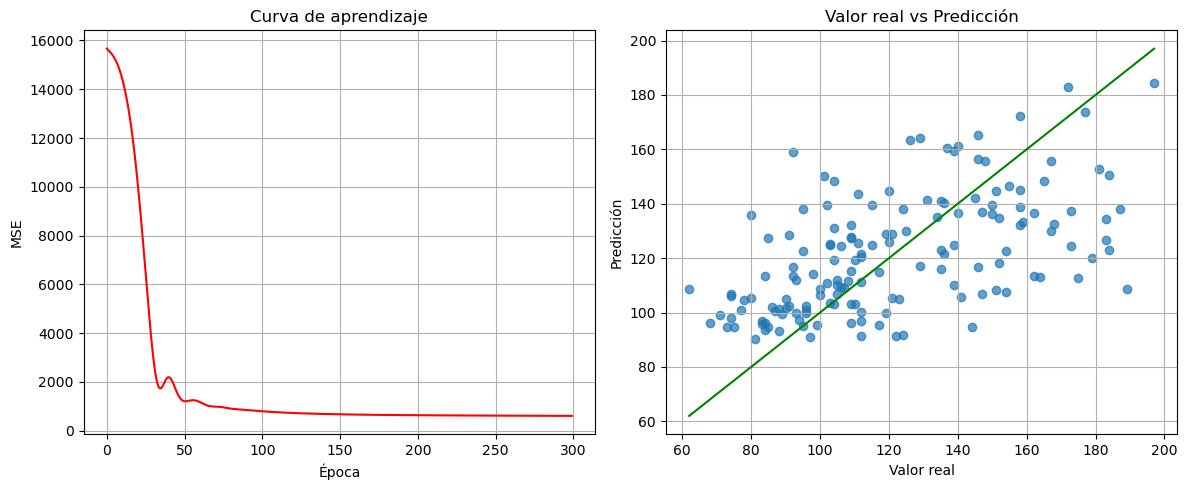

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, color='red')
plt.title("Curva de aprendizaje")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test_np, predictions, alpha=0.7)
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='green')
plt.title("Valor real vs Predicción")
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.grid(True)

plt.tight_layout()
plt.show()